In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
nohitter_times = pd.read_csv('datasets/mlb_nohitters.csv')
nohitter_times.head()

,date,game_number,winning_team,losing_team,winning_pitcher
0,18760715,140,NaN,NaN,NaN
1,18800612,1035,NaN,NaN,NaN
2,18800617,1046,NaN,NaN,NaN
3,18800819,1177,NaN,NaN,NaN
4,18800820,1179,NaN,NaN,NaN


In [3]:
tau = np.mean(nohitter_times['game_number'])

In [4]:
inter_nohitter_time = np.random.exponential(tau,10000)

C:\Users\brama\Miniconda3\envs\ds\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


(array([9.31900028e-06, 8.19084892e-06, 6.65139238e-06, 5.38222210e-06,
        4.37158651e-06, 3.96028133e-06, 3.22580779e-06, 2.84388155e-06,
        2.52658898e-06, 2.08002907e-06, 1.49245023e-06, 1.56883548e-06,
        1.10464820e-06, 1.02238717e-06, 8.87244037e-07, 5.93454621e-07,
        5.99330409e-07, 5.46448314e-07, 3.52547299e-07, 2.40907321e-07,
        2.46783110e-07, 2.93789416e-07, 2.58534686e-07, 1.88025226e-07,
        1.70397861e-07, 1.05764190e-07, 9.98884015e-08, 6.46336716e-08,
        7.63852482e-08, 5.28820949e-08, 2.93789416e-08, 1.17515766e-08,
        3.52547299e-08, 2.93789416e-08, 2.35031533e-08, 0.00000000e+00,
        5.87578832e-09, 1.76273650e-08, 1.17515766e-08, 1.17515766e-08,
        0.00000000e+00, 1.17515766e-08, 1.17515766e-08, 1.76273650e-08,
        1.17515766e-08, 5.87578832e-09, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 5.87578832e-09]),
 array([2.15268941e+00, 1.70211456e+04, 3.40401386e+04, 5.10591315e+04,
        6.80781244e+04

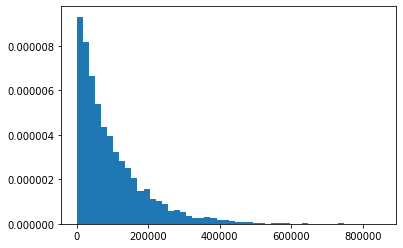

In [5]:
plt.hist(inter_nohitter_time, bins=50, normed=True)

In [6]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n +1) / n

    return x, y

In [7]:
x,y = ecdf(nohitter_times['game_number'])

In [8]:
x_theor, y_theor = ecdf(inter_nohitter_time)

[]

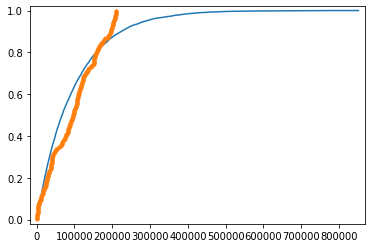

In [9]:
plt.plot(x_theor,y_theor)
plt.plot(x,y, marker='.', linestyle='none')

plt.margins(0.02)
plt.plot()

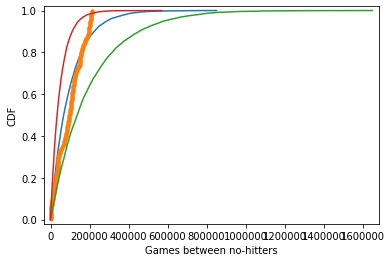

In [10]:
# Plot the theoretical CDFs
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Take samples with half tau: samples_half
samples_half = np.random.exponential(0.5 * tau, 10000)

# Take samples with double tau: samples_double
samples_double = np.random.exponential(2 * tau, 10000)

# Generate CDFs from these samples
x_half, y_half = ecdf(samples_double)
x_double, y_double = ecdf(samples_half)

# Plot these CDFs as lines
_ = plt.plot(x_half, y_half)
_ = plt.plot(x_double, y_double)

# Show the plot
plt.show()

Linear Regression

In [11]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

In [12]:
ferlit = pd.read_csv('datasets/female_literacy_fertility.csv')
ferlit.head()

,Country,Continent,female literacy,fertility,population
0,Chine,ASI,90.5,1.769,"1,324,655,000"
1,Inde,ASI,50.8,2.682,"1,139,964,932"
2,USA,NAM,99.0,2.077,"304,060,000"
3,Indonésie,ASI,88.8,2.132,"227,345,082"
4,Brésil,LAT,90.2,1.827,"191,971,506"


In [13]:
fertility = ferlit['fertility'].values

In [14]:
illiteracy = 100- ferlit['female literacy'].values

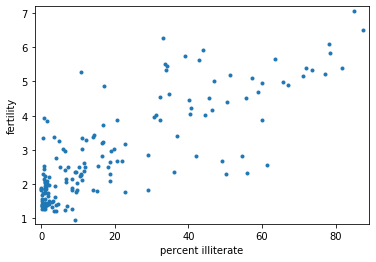

0.8041324026815346


In [15]:
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy,fertility, marker='.', linestyle='none')

# Set the margins and label axes
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Show the plot
plt.show()

# Show the Pearson correlation coefficient
print(pearson_r(illiteracy, fertility))


slope = 0.04979854809063423 children per woman / percent illiterate
intercept = 1.888050610636557 children per woman


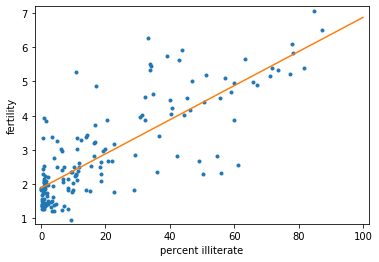

In [16]:
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(illiteracy, fertility,1 )

# Print the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

# Make theoretical line to plot
x = np.array([0,100])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()


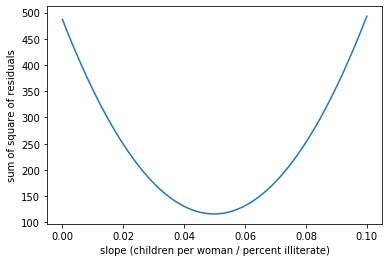

In [17]:
# Specify slopes to consider: a_vals
a_vals = np.linspace(0,0.1,200)

# Initialize sum of square of residuals: rss
rss = np.empty_like(a_vals)

# Compute sum of square of residuals for each value of a_vals
for i, a in enumerate(a_vals):
    rss[i] = np.sum(( fertility - a*illiteracy - b)**2)

# Plot the RSS
plt.plot(a_vals, rss, '-')
plt.xlabel('slope (children per woman / percent illiterate)')
plt.ylabel('sum of square of residuals')

plt.show()

# Chapter 2 - Bootstraping

In [18]:
rainfall = pd.read_csv('datasets/sheffield_weather_station.csv', sep='\s+', skiprows=8)
rainfall.tail()

,yyyy,mm,tmax,tmin,af,rain,sun
1597,2016,2,7.8,2.0,5,68.6,96.1
1598,2016,3,9.1,2.9,2,87.2,98.6
1599,2016,4,11.6,3.8,1,65.8,154.9
1600,2016,5,16.9,7.9,0,58.2,164.5
1601,2016,6,18.8,11.1,0,130.4,106.5


In [19]:
rainfall['yyyy'] = pd.to_datetime(rainfall['yyyy'], format='%Y')

In [20]:
rainfall.set_index('yyyy', inplace=True)

In [21]:
rainfall.tail()

,mm,tmax,tmin,af,rain,sun
yyyy,,,,,,
2016-01-01,2,7.8,2.0,5,68.6,96.1
2016-01-01,3,9.1,2.9,2,87.2,98.6
2016-01-01,4,11.6,3.8,1,65.8,154.9
2016-01-01,5,16.9,7.9,0,58.2,164.5
2016-01-01,6,18.8,11.1,0,130.4,106.5


In [22]:
rainfall = rainfall.resample('Y').sum()['rain']

In [23]:
rainfall


yyyy
1883-12-31     875.5
1884-12-31     648.2
1885-12-31     788.1
1886-12-31     940.3
1887-12-31     491.1
               ...  
2012-12-31    1146.4
2013-12-31     728.2
2014-12-31     864.2
2015-12-31     793.0
2016-12-31     521.7
Freq: A-DEC, Name: rain, Length: 134, dtype: float64

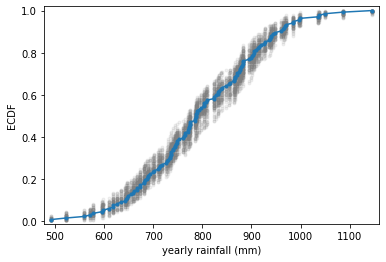

In [24]:
for _ in range(50):
    bs_sample = np.random.choice(rainfall, size=len(rainfall))
    x,y = ecdf(bs_sample)
    plt.plot(x,y,marker='.',color='gray',linestyle='none',alpha=0.1)
    
x,y = ecdf(rainfall)
plt.plot(x,y,marker='.')
plt.margins(0.02)
plt.xlabel('yearly rainfall (mm)')
plt.ylabel('ECDF')

plt.show()

In [25]:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

In [26]:
def draw_bs_reps(data, func, size=1):
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates


10.635458130769608
10.514262609418074


C:\Users\brama\Miniconda3\envs\ds\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  del sys.path[0]


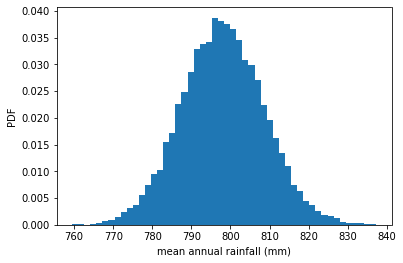

In [27]:

# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.mean, 10000)

# Compute and print SEM
sem = np.std(rainfall) / np.sqrt(len(rainfall))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('mean annual rainfall (mm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

C:\Users\brama\Miniconda3\envs\ds\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


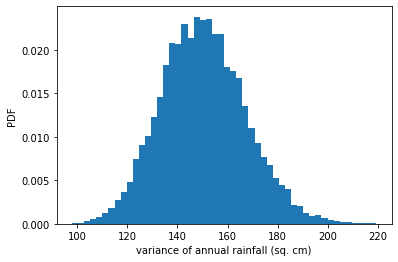

In [28]:
# Generate 10,000 bootstrap replicates of the variance: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.var,10000)

# Put the variance in units of square centimeters
bs_replicates = bs_replicates/ 100

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('variance of annual rainfall (sq. cm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()


In [29]:
nohitter_times = np.array([ 843, 1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,
        715,  966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,
        104, 1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,
        166,   96,  702,   23,  524,   26,  299,   59,   39,   12,    2,
        308, 1114,  813,  887,  645, 2088,   42, 2090,   11,  886, 1665,
       1084, 2900, 2432,  750, 4021, 1070, 1765, 1322,   26,  548, 1525,
         77, 2181, 2752,  127, 2147,  211,   41, 1575,  151,  479,  697,
        557, 2267,  542,  392,   73,  603,  233,  255,  528,  397, 1529,
       1023, 1194,  462,  583,   37,  943,  996,  480, 1497,  717,  224,
        219, 1531,  498,   44,  288,  267,  600,   52,  269, 1086,  386,
        176, 2199,  216,   54,  675, 1243,  463,  650,  171,  327,  110,
        774,  509,    8,  197,  136,   12, 1124,   64,  380,  811,  232,
        192,  731,  715,  226,  605,  539, 1491,  323,  240,  179,  702,
        156,   82, 1397,  354,  778,  603, 1001,  385,  986,  203,  149,
        576,  445,  180, 1403,  252,  675, 1351, 2983, 1568,   45,  899,
       3260, 1025,   31,  100, 2055, 4043,   79,  238, 3931, 2351,  595,
        110,  215,    0,  563,  206,  660,  242,  577,  179,  157,  192,
        192, 1848,  792, 1693,   55,  388,  225, 1134, 1172, 1555,   31,
       1582, 1044,  378, 1687, 2915,  280,  765, 2819,  511, 1521,  745,
       2491,  580, 2072, 6450,  578,  745, 1075, 1103, 1549, 1520,  138,
       1202,  296,  277,  351,  391,  950,  459,   62, 1056, 1128,  139,
        420,   87,   71,  814,  603, 1349,  162, 1027,  783,  326,  101,
        876,  381,  905,  156,  419,  239,  119,  129,  467])

95% confidence interval = [663.39691235 871.43306773] games


C:\Users\brama\Miniconda3\envs\ds\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


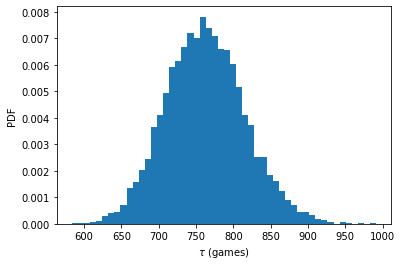

In [30]:
bs_replicates = draw_bs_reps(nohitter_times, np.mean,10000)
conf_int = np.percentile(bs_replicates,[2.5, 97.5])
print('95% confidence interval =', conf_int, 'games')

# Plot the histogram of the replicates
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel(r'$\tau$ (games)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()


In [31]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(0,len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y,1)

    return bs_slope_reps, bs_intercept_reps

[0.04412814 0.05553221]


C:\Users\brama\Miniconda3\envs\ds\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


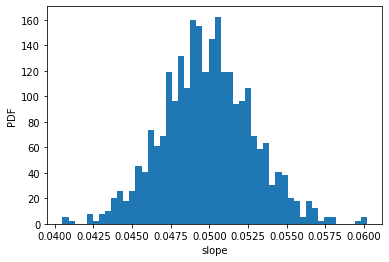

In [32]:
# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(illiteracy, fertility, 1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5,97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, normed=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

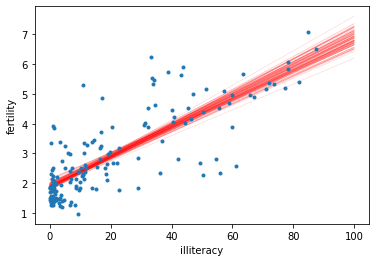

In [33]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0,100])

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x, 
                 bs_slope_reps[i]*x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.plot(illiteracy,fertility, marker='.', linestyle='none')
# Label axes, set the margins, and show the plot
_ = plt.xlabel('illiteracy')
_ = plt.ylabel('fertility')

plt.show()

# hypothesis test

In [34]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

In [35]:
rainfall.head()

yyyy
1883-12-31    875.5
1884-12-31    648.2
1885-12-31    788.1
1886-12-31    940.3
1887-12-31    491.1
Freq: A-DEC, Name: rain, dtype: float64

In [36]:
rain_june = rainfall[rainfall['mm'] == 6]['rain']
rain_june.mean()

KeyError: 'mm'

In [37]:
rain_november = rainfall[rainfall['mm'] == 11]['rain']
rain_november.mean()

KeyError: 'mm'

In [ ]:
for _ in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(rain_june, rain_november)


    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(rain_june)
x_2, y_2 = ecdf(rain_november)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('monthly rainfall (mm)')
_ = plt.ylabel('ECDF')
plt.show()

In [38]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

In [39]:
df = pd.read_csv('datasets/frog_tongue.csv', skiprows=14)
df.head()

,date,ID,trial number,impact force (mN),impact time (ms),impact force / body weight,adhesive force (mN),time frog pulls on target (ms),adhesive force / body weight,adhesive impulse (N-s),total contact area (mm2),contact area without mucus (mm2),contact area with mucus / contact area without mucus,contact pressure (Pa),adhesive strength (Pa)
0,2013_02_26,I,3,1205,46,1.95,-785,884,1.27,-0.290,387,70,0.82,3117,-2030
1,2013_02_26,I,4,2527,44,4.08,-983,248,1.59,-0.181,101,94,0.07,24923,-9695
2,2013_03_01,I,1,1745,34,2.82,-850,211,1.37,-0.157,83,79,0.05,21020,-10239
3,2013_03_01,I,2,1556,41,2.51,-455,1025,0.74,-0.170,330,158,0.52,4718,-1381
4,2013_03_01,I,3,493,36,0.80,-974,499,1.57,-0.423,245,216,0.12,2012,-3975


In [40]:
df_juv = df[df['ID'] == 'II'][['ID','impact force (mN)']]
df_juv.head()

,ID,impact force (mN)
20,II,1612
21,II,605
22,II,327
23,II,946
24,II,541


In [41]:
df_adl = df[df['ID'] == 'IV'][['ID','impact force (mN)']]
df_adl.head()

,ID,impact force (mN)
60,IV,172
61,IV,142
62,IV,37
63,IV,453
64,IV,355


In [42]:
frog = pd.concat([df_juv, df_adl],axis=0)
frog.tail()

df = frog

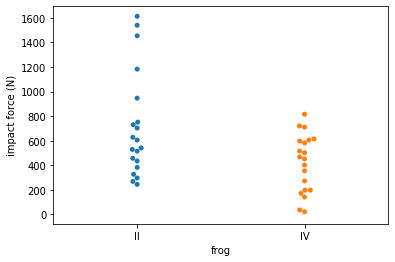

In [43]:

# Make bee swarm plot
_ = sns.swarmplot(df['ID'], df['impact force (mN)'])

# Label axes
_ = plt.xlabel('frog')
_ = plt.ylabel('impact force (N)')

# Show the plot
plt.show()


In [44]:
force_a = df[df['ID']=='II']['impact force (mN)'].values

In [45]:
force_b = df[df['ID']=='IV']['impact force (mN)'].values

In [46]:
force_a

array([1612,  605,  327,  946,  541, 1539,  529,  628, 1453,  297,  703,
        269,  751,  245, 1182,  515,  435,  383,  457,  730], dtype=int64)

In [47]:
len(force_b)

20

In [48]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

In [49]:
empirical_diff_means = diff_of_means(force_a, force_b)
perm_replicates = draw_perm_reps(force_a, force_b,
                                 diff_of_means, size=10000)
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)
print('p-value =', p)

p-value = 0.0039


In [50]:
# Make an array of translated impact forces: translated_force_b
translated_force_b = force_b - np.mean(force_b) + 550

# Take bootstrap replicates of Frog B's translated impact forces: bs_replicates
bs_replicates = draw_bs_reps(translated_force_b, np.mean, 10000)

# Compute fraction of replicates that are less than the observed Frog B force: p
p = np.sum(bs_replicates <= np.mean(force_b)) / 10000

# Print the p-value
print('p = ', p)


p =  0.0064


# Chapter 3

In [63]:
r_obs = pearson_r(illiteracy, fertility)
r_obs

0.8041324026815346

In [68]:
perm_replicates = np.empty(10000)
perm_replicates[1]

1.4498497930497e-311

In [71]:
for i in range(0,10000):
    illiteracy_permuted = np.random.permutation(illiteracy)
    perm_replicates[i] = pearson_r(illiteracy_permuted, fertility)

In [73]:
p=np.sum(perm_replicates > r_obs)/10000
print(p)

0.0


In [85]:
bee = pd.read_csv('datasets/bee_sperm.csv', skiprows=3)
bee.head()

,Specimen,Treatment,Environment,TreatmentNCSS,Sample ID,Colony,Cage,Sample,Sperm Volume per 500 ul,Quantity,ViabilityRaw (%),Quality,Age (d),Infertil,AliveSperm,Quantity Millions,Alive Sperm Millions,Dead Sperm Millions
0,227,Control,Cage,1,C2-1-1,2,1,1,2150000,2150000,96.7263814616756,96.726381,14,0,2079617,2.1500,2.079617,0.070383
1,228,Control,Cage,1,C2-1-2,2,1,2,2287500,2287500,96.3498079760595,96.349808,14,0,2204001,2.2875,2.204001,0.083499
2,229,Control,Cage,1,C2-1-3,2,1,3,87500,87500,98.75,98.750000,14,0,86406,0.0875,0.086406,0.001094
3,230,Control,Cage,1,C2-1-4,2,1,4,1875000,1875000,93.2874208336941,93.287421,14,0,1749139,1.8750,1.749139,0.125861
4,231,Control,Cage,1,C2-1-5,2,1,5,1587500,1587500,97.7925061050061,97.792506,14,0,1552456,1.5875,1.552456,0.035044


In [86]:
bee['AliveSperm per mL'] = bee['AliveSperm'] * 2 / 1e6

In [87]:
bee.head()

,Specimen,Treatment,Environment,TreatmentNCSS,Sample ID,Colony,Cage,Sample,Sperm Volume per 500 ul,Quantity,ViabilityRaw (%),Quality,Age (d),Infertil,AliveSperm,Quantity Millions,Alive Sperm Millions,Dead Sperm Millions,AliveSperm per mL
0,227,Control,Cage,1,C2-1-1,2,1,1,2150000,2150000,96.7263814616756,96.726381,14,0,2079617,2.1500,2.079617,0.070383,4.159234
1,228,Control,Cage,1,C2-1-2,2,1,2,2287500,2287500,96.3498079760595,96.349808,14,0,2204001,2.2875,2.204001,0.083499,4.408002
2,229,Control,Cage,1,C2-1-3,2,1,3,87500,87500,98.75,98.750000,14,0,86406,0.0875,0.086406,0.001094,0.172812
3,230,Control,Cage,1,C2-1-4,2,1,4,1875000,1875000,93.2874208336941,93.287421,14,0,1749139,1.8750,1.749139,0.125861,3.498278
4,231,Control,Cage,1,C2-1-5,2,1,5,1587500,1587500,97.7925061050061,97.792506,14,0,1552456,1.5875,1.552456,0.035044,3.104912


In [88]:
control = bee[bee['Treatment'] == 'Control']['AliveSperm per mL']
treated = bee[bee['Treatment'] == 'Pesticide']['AliveSperm per mL']

In [89]:
len(control)

145

In [90]:
len(treated)

90

In [91]:
# Compute x,y values for ECDFs
x_control, y_control = ecdf(control)
x_treated, y_treated = ecdf(treated)


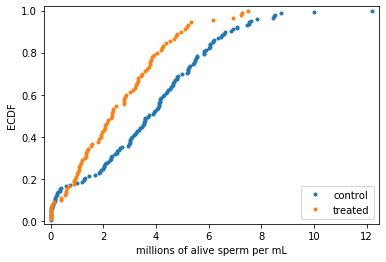

In [92]:

# Plot the ECDFs
plt.plot(x_control,y_control, marker='.', linestyle='none')
plt.plot(x_treated, y_treated, marker='.', linestyle='none')

# Set the margins
plt.margins(0.02)

# Add a legend
plt.legend(('control', 'treated'), loc='lower right')

# Label axes and show plot
plt.xlabel('millions of alive sperm per mL')
plt.ylabel('ECDF')
plt.show()


In [84]:
2079617 *2

4159234

In [94]:
diff_means = diff_of_means(control, treated)

In [95]:
diff_means

1.1460587295019158

In [96]:
mean_count = np.mean(np.concatenate((treated, control), axis = 0))

In [97]:
mean_count

3.3066380425531916

In [98]:
control_shifted = control - np.mean(control) + mean_count
treated_shifted = treated - np.mean(treated) + mean_count

In [102]:
# Generate bootstrap replicates
bs_reps_control = draw_bs_reps(control_shifted,np.mean, size=10000)
bs_reps_treated = draw_bs_reps(treated_shifted,np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_reps_control - bs_reps_treated

# Compute and print p-value: p
p = np.sum(bs_replicates >= np.mean(control) - np.mean(treated)) \
            / len(bs_replicates)
print('p-value =', p)

p-value = 0.0


# chapter 5

In [226]:
df75 = pd.read_csv('datasets/finch_beaks_1975.csv')
df75['year'] = '1975'
df75['beak_depth'] = df75['Beak depth, mm']
df75 = df75[df75['species']=='scandens']

df75.head()

,band,species,"Beak length, mm","Beak depth, mm",year,beak_depth
316,302,scandens,13.9,8.4,1975,8.4
317,304,scandens,14.0,8.8,1975,8.8
318,306,scandens,12.9,8.4,1975,8.4
319,310,scandens,13.5,8.0,1975,8.0
320,317,scandens,12.9,7.9,1975,7.9


In [227]:
df12 = pd.read_csv('datasets/finch_beaks_2012.csv')
df12['year'] = '2012'
df12['beak_depth'] = df12['bdepth']
df12 = df12[df12['species']=='scandens']
df12.head()

,band,species,blength,bdepth,year,beak_depth
121,19026,scandens,14.3,9.4,2012,9.4
122,19028,scandens,12.5,8.9,2012,8.9
123,19029,scandens,13.7,9.5,2012,9.5
124,19094,scandens,13.8,11.0,2012,11.0
125,19122,scandens,12.0,8.7,2012,8.7


In [228]:
df = pd.concat([df75, df12],axis=0)

In [229]:
df.head()

,band,species,"Beak length, mm","Beak depth, mm",year,beak_depth,blength,bdepth
316,302,scandens,13.9,8.4,1975,8.4,NaN,NaN
317,304,scandens,14.0,8.8,1975,8.8,NaN,NaN
318,306,scandens,12.9,8.4,1975,8.4,NaN,NaN
319,310,scandens,13.5,8.0,1975,8.0,NaN,NaN
320,317,scandens,12.9,7.9,1975,7.9,NaN,NaN


In [230]:
df = df[['beak_depth','year']]

In [231]:
df.head()

,beak_depth,year
316,8.4,1975
317,8.8,1975
318,8.4,1975
319,8.0,1975
320,7.9,1975


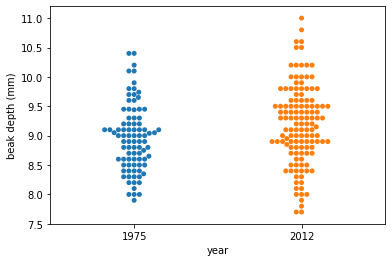

In [232]:
sns.swarmplot(df['year'], df['beak_depth'])
plt.xlabel('year')
plt.ylabel('beak depth (mm)')
plt.show()

In [233]:
bd_1975 = df[df['year']== '1975']['beak_depth'].values
bd_2012 = df[df['year']== '2012']['beak_depth'].values

bd_1975

array([ 8.4 ,  8.8 ,  8.4 ,  8.  ,  7.9 ,  8.9 ,  8.6 ,  8.5 ,  8.9 ,
        9.1 ,  8.6 ,  9.8 ,  8.2 ,  9.  ,  9.7 ,  8.6 ,  8.2 ,  9.  ,
        8.4 ,  8.6 ,  8.9 ,  9.1 ,  8.3 ,  8.7 ,  9.6 ,  8.5 ,  9.1 ,
        9.  ,  9.2 ,  9.9 ,  8.6 ,  9.2 ,  8.4 ,  8.9 ,  8.5 , 10.4 ,
        9.6 ,  9.1 ,  9.3 ,  9.3 ,  8.8 ,  8.3 ,  8.8 ,  9.1 , 10.1 ,
        8.9 ,  9.2 ,  8.5 , 10.2 , 10.1 ,  9.2 ,  9.7 ,  9.1 ,  8.5 ,
        8.2 ,  9.  ,  9.3 ,  8.  ,  9.1 ,  8.1 ,  8.3 ,  8.7 ,  8.8 ,
        8.6 ,  8.7 ,  8.  ,  8.8 ,  9.  ,  9.1 ,  9.74,  9.1 ,  9.8 ,
       10.4 ,  8.3 ,  9.44,  9.04,  9.  ,  9.05,  9.65,  9.45,  8.65,
        9.45,  9.45,  9.05,  8.75,  9.45,  8.35])

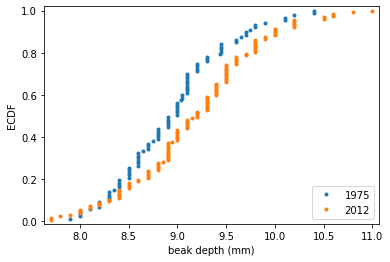

In [234]:
# Compute ECDFs
x_1975, y_1975 = ecdf(bd_1975)
x_2012, y_2012 = ecdf(bd_2012)

# Plot the ECDFs
_ = plt.plot(x_1975, y_1975, marker='.', linestyle='none')
_ = plt.plot(x_2012, y_2012, marker='.', linestyle='none')

# Set margins
plt.margins(0.02)

# Add axis labels and legend
_ = plt.xlabel('beak depth (mm)')
_ = plt.ylabel('ECDF')
_ = plt.legend(('1975', '2012'), loc='lower right')

# Show the plot
plt.show()

In [235]:
# Compute the difference of the sample means: mean_diff
mean_diff = np.mean(bd_2012) - np.mean(bd_1975) 

# Get bootstrap replicates of means
bs_replicates_1975 = draw_bs_reps(bd_1975, np.mean,10000)
bs_replicates_2012 =  draw_bs_reps(bd_2012, np.mean,10000)

# Compute samples of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975 

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_diff_replicates, [2.5, 97.5])

# Print the results
print('difference of means =', mean_diff, 'mm')
print('95% confidence interval =', conf_int, 'mm')

difference of means = 0.22622047244094645 mm
95% confidence interval = [0.0616647  0.39452376] mm


In [236]:
# Compute mean of combined data set: combined_mean
combined_mean = np.mean(np.concatenate((bd_1975, bd_2012)))

# Shift the samples
bd_1975_shifted = bd_1975 - np.mean(bd_1975) + combined_mean
bd_2012_shifted = bd_2012 - np.mean(bd_2012) + combined_mean

# Get bootstrap replicates of shifted data sets
bs_replicates_1975 = draw_bs_reps(bd_1975_shifted, np.mean, 100000)
bs_replicates_2012 = draw_bs_reps(bd_2012_shifted, np.mean, 100000)

# Compute replicates of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975 
# Compute the p-value
p = np.sum(bs_diff_replicates >= mean_diff) / len(bs_diff_replicates)

# Print p-value
print('p =', p)


p = 0.00329


In [237]:
bl_1975 = df75['Beak length, mm'].values
bl_2012 = df12['blength'].values

bl_2012

array([14.3 , 12.5 , 13.7 , 13.8 , 12.  , 13.  , 13.  , 13.6 , 12.8 ,
       13.6 , 12.95, 13.1 , 13.4 , 13.9 , 12.3 , 14.  , 12.5 , 12.3 ,
       13.9 , 13.1 , 12.5 , 13.9 , 13.7 , 12.  , 14.4 , 13.5 , 13.8 ,
       13.  , 14.9 , 12.5 , 12.3 , 12.8 , 13.4 , 13.8 , 13.5 , 13.5 ,
       13.4 , 12.3 , 14.35, 13.2 , 13.8 , 14.6 , 14.3 , 13.8 , 13.6 ,
       12.9 , 13.  , 13.5 , 13.2 , 13.7 , 13.1 , 13.2 , 12.6 , 13.  ,
       13.9 , 13.2 , 15.  , 13.37, 11.4 , 13.8 , 13.  , 13.  , 13.1 ,
       12.8 , 13.3 , 13.5 , 12.4 , 13.1 , 14.  , 13.5 , 11.8 , 13.7 ,
       13.2 , 12.2 , 13.  , 13.1 , 14.7 , 13.7 , 13.5 , 13.3 , 14.1 ,
       12.5 , 13.7 , 14.6 , 14.1 , 12.9 , 13.9 , 13.4 , 13.  , 12.7 ,
       12.1 , 14.  , 14.9 , 13.9 , 12.9 , 14.6 , 14.  , 13.  , 12.7 ,
       14.  , 14.1 , 14.1 , 13.  , 13.5 , 13.4 , 13.9 , 13.1 , 12.9 ,
       14.  , 14.  , 14.1 , 14.7 , 13.4 , 13.8 , 13.4 , 13.8 , 12.4 ,
       14.1 , 12.9 , 13.9 , 14.3 , 13.2 , 14.2 , 13.  , 14.6 , 13.1 ,
       15.2 ])

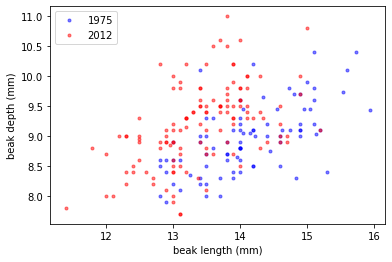

In [238]:
# Make scatter plot of 1975 data
_ = plt.plot(bl_1975, bd_1975, marker='.',
             linestyle='None', color='blue', alpha=0.5)

# Make scatter plot of 2012 data
_ = plt.plot(bl_2012, bd_2012, marker='.',
            linestyle='None', color='red', alpha=0.5)

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Show the plot
plt.show()

In [239]:
len(bl_1975)

87

In [240]:
# Compute the linear regressions
slope_1975, intercept_1975 = np.polyfit(bl_1975, bd_1975,1)
slope_2012, intercept_2012 = np.polyfit(bl_2012, bd_2012,1)

# Perform pairs bootstrap for the linear regressions
bs_slope_reps_1975, bs_intercept_reps_1975 = draw_bs_pairs_linreg(bl_1975, bd_1975, 100)
bs_slope_reps_2012, bs_intercept_reps_2012 = draw_bs_pairs_linreg(bl_2012, bd_2012, 100)

# Compute confidence intervals of slopes
slope_conf_int_1975 = np.percentile(bs_slope_reps_1975,[2.5, 97.5])
slope_conf_int_2012 = np.percentile(bs_slope_reps_2012,[2.5, 97.5])
intercept_conf_int_1975 = np.percentile(bs_intercept_reps_1975,[2.5, 97.5])
intercept_conf_int_2012 = np.percentile(bs_intercept_reps_2012,[2.5, 97.5])


# Print the results
print('1975: slope =', slope_1975,
      'conf int =', slope_conf_int_1975)
print('1975: intercept =', intercept_1975,
      'conf int =', intercept_conf_int_1975)
print('2012: slope =', slope_2012,
      'conf int =', slope_conf_int_2012)
print('2012: intercept =', intercept_2012,
      'conf int =', intercept_conf_int_2012)

1975: slope = 0.46520516916059357 conf int = [0.31813678 0.59173922]
1975: intercept = 2.3908752365842285 conf int = [0.63921716 4.42363558]
2012: slope = 0.4626303588353128 conf int = [0.33307271 0.59375274]
2012: intercept = 2.9772474982360198 conf int = [1.24180874 4.68786918]


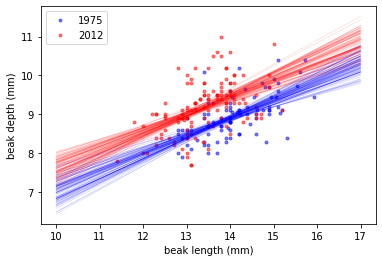

In [241]:
# Make scatter plot of 1975 data
_ = plt.plot(bl_1975, bd_1975, marker='.',
             linestyle='none', color='blue', alpha=0.5)

# Make scatter plot of 2012 data
_ = plt.plot(bl_2012, bd_2012, marker='.',
             linestyle='none', color='red', alpha=0.5)

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Generate x-values for bootstrap lines: x
x = np.array([10, 17])

# Plot the bootstrap lines
for i in range(100):
    plt.plot(x,bs_slope_reps_1975[i] * x + bs_intercept_reps_1975[i],
             linewidth=0.5, alpha=0.2, color='blue')
    plt.plot(x,bs_slope_reps_2012[i] * x + bs_intercept_reps_2012[i],
             linewidth=0.5, alpha=0.2, color='red')

# Draw the plot again
plt.show()

In [242]:
# Compute length-to-depth ratios
ratio_1975 = bl_1975 / bd_1975
ratio_2012 = bl_2012 / bd_2012

# Compute means
mean_ratio_1975 = np.mean(ratio_1975)
mean_ratio_2012 = np.mean(ratio_2012)

# Generate bootstrap replicates of the means
bs_replicates_1975 = draw_bs_reps(ratio_1975, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(ratio_2012, np.mean, 10000)

# Compute the 99% confidence intervals
conf_int_1975 = np.percentile(bs_replicates_1975,[0.5,99.5])
conf_int_2012 = np.percentile(bs_replicates_2012,[0.5,99.5])

# Print the results
print('1975: mean ratio =', mean_ratio_1975,
      'conf int =', conf_int_1975)
print('2012: mean ratio =', mean_ratio_2012,
      'conf int =', conf_int_2012)


1975: mean ratio = 1.5788823771858533 conf int = [1.55760675 1.59999142]
2012: mean ratio = 1.4658342276847767 conf int = [1.44343676 1.48732507]


In [244]:
scandens = pd.read_csv('datasets/scandens_beak_depth_heredity.csv')
scandens.head()

,mid_parent,mid_offspring
0,8.3318,8.4190
1,8.4035,9.2468
2,8.5317,8.1532
3,8.7202,8.0089
4,8.7089,8.2215


In [245]:
bd_parent_scandens = scandens['mid_parent'].values
bd_offspring_scandens = scandens['mid_offspring'].values

In [247]:
fortis = pd.read_csv('datasets/fortis_beak_depth_heredity.csv')
fortis['parent'] = fortis['Male BD'] * 0.5 + fortis['Female BD'] * 0.5 
fortis.head()

,Mid-offspr,Male BD,Female BD,parent
0,10.70,10.90,9.3,10.100
1,9.78,10.70,8.4,9.550
2,9.48,10.70,8.1,9.400
3,9.60,10.70,9.8,10.250
4,10.27,9.85,10.4,10.125


In [248]:
bd_parent_fortis=fortis['parent'].values
bd_offspring_fortis = fortis['Mid-offspr'].values

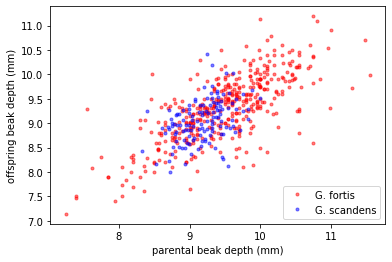

In [252]:
# Make scatter plots
_ = plt.plot(bd_parent_fortis,bd_offspring_fortis,
             marker='.', linestyle='none', color='red', alpha=0.5)
_ = plt.plot(bd_parent_scandens, bd_offspring_scandens,
             marker='.', linestyle='none', color='blue', alpha=0.5)
# Label axes
_ = plt.xlabel('parental beak depth (mm)')
_ =plt.ylabel('offspring beak depth (mm)')

# Add legend
_ = plt.legend(('G. fortis', 'G. scandens'), loc='lower right')

# Show plot
plt.show()


In [253]:

def draw_bs_pairs(x, y, func, size=1):
    """Perform pairs bootstrap for a single statistic."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_replicates[i] = func(bs_x, bs_y)

    return bs_replicates

In [255]:
# Compute the Pearson correlation coefficients
r_scandens = pearson_r(bd_parent_scandens, bd_offspring_scandens)
r_fortis = pearson_r(bd_parent_fortis, bd_offspring_fortis)

# Acquire 1000 bootstrap replicates of Pearson r
bs_replicates_scandens = draw_bs_pairs(bd_parent_scandens, bd_offspring_scandens, pearson_r, 1000)

bs_replicates_fortis = draw_bs_pairs(bd_parent_fortis, bd_offspring_fortis, pearson_r, 1000)


# Compute 95% confidence intervals
conf_int_scandens = np.percentile(bs_replicates_scandens,[2.5,97.5])
conf_int_fortis = np.percentile(bs_replicates_fortis,[2.5,97.5])

# Print results
print('G. scandens:', r_scandens, conf_int_scandens)
print('G. fortis:', r_fortis, conf_int_fortis)


G. scandens: 0.41170636294012586 [0.25940859 0.54687041]
G. fortis: 0.7283412395518486 [0.67121815 0.78105525]


In [257]:
def heritability(parents, offspring):
    """Compute the heritability from parent and offspring samples."""
    covariance_matrix = np.cov(parents, offspring)
    return covariance_matrix[0,1] / covariance_matrix[0,0]

# Compute the heritability
heritability_scandens = heritability(bd_parent_scandens, bd_offspring_scandens)
heritability_fortis = heritability(bd_parent_fortis, bd_offspring_fortis)

# Acquire 1000 bootstrap replicates of heritability
replicates_scandens = draw_bs_pairs(bd_parent_scandens, bd_offspring_scandens, heritability, size=1000)
replicates_fortis = draw_bs_pairs(bd_parent_fortis, bd_offspring_fortis, heritability, size=1000)


# Compute 95% confidence intervals
conf_int_scandens = np.percentile(replicates_scandens, [2.5, 97.5])
conf_int_fortis = np.percentile(replicates_fortis, [2.5, 97.5])

# Print results
print('G. scandens:', heritability_scandens, conf_int_scandens)
print('G. fortis:', heritability_fortis, conf_int_fortis)


G. scandens: 0.5485340868685983 [0.35462443 0.74635907]
G. fortis: 0.7229051911438156 [0.64418184 0.79524828]


In [261]:
# Initialize array of replicates: perm_replicates
perm_replicates = np.arange(10000)

# Draw replicates
for i in range(10000):
    # Permute parent beak depths
    bd_parent_permuted = np.random.permutation(bd_parent_scandens)
    perm_replicates[i] = heritability(bd_parent_permuted, bd_offspring_scandens)


# Compute p-value: p
p = np.sum(perm_replicates >= heritability(bd_parent_scandens, bd_offspring_scandens)) / len(perm_replicates)

# Print the p-value
print('p-val =', p)


p-val = 0.0
